In [3]:
import matplotlib.pyplot as plt
plt.rc('font', size=20)
plt.rc('font', family = 'serif')

import numpy as np

## Gaussian Example

In [15]:
gauss_data = np.random.normal(0,1,100000)
gauss_sim = np.random.normal(-0.5,1,100000)
gausslosses = np.load('npfiles/gaussloss.npy')

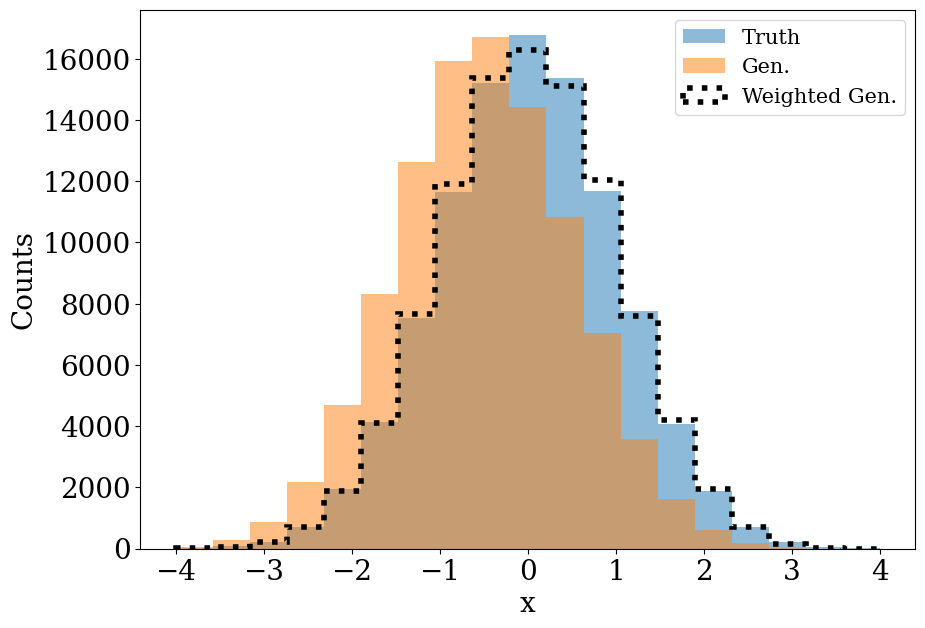

In [12]:
#plots with hand inserted lambda
lambda1 = 0.5
c = 'black'

xvals = np.concatenate([gauss_data,gauss_sim])
yvals = np.concatenate([np.ones(len(gauss_data)),np.zeros(len(gauss_sim))])
weights = np.concatenate([np.ones(len(gauss_data)),np.exp(lambda1*gauss_sim)*len(gauss_data)/np.sum(np.exp(lambda1*gauss_sim))])

fig, ax = plt.subplots(figsize=(10, 7))

ax.xaxis.label.set_color(c)        
ax.yaxis.label.set_color(c)          
ax.tick_params(axis='x', colors=c)  
ax.tick_params(axis='y', colors=c)  
ax.spines['left'].set_color(c)        
ax.spines['top'].set_color(c)
ax.spines['right'].set_color(c) 
ax.spines['bottom'].set_color(c) 

_,_,_=plt.hist(xvals[yvals==1],bins=np.linspace(-4,4,20),alpha=0.5,label="Truth")
_,_,_=plt.hist(xvals[yvals==0],bins=np.linspace(-4,4,20),alpha=0.5,label="Gen.")
_,_,_=plt.hist(xvals[yvals==0],bins=np.linspace(-4,4,20),weights=weights[yvals==0],histtype="step",color=c,ls=":", lw=4,label="Weighted Gen.")
plt.legend(fontsize=15)
plt.xlabel("x")
plt.ylabel("Counts")
plt.savefig("figures/gaussexample.pdf", bbox_inches='tight', transparent=True)
plt.show()

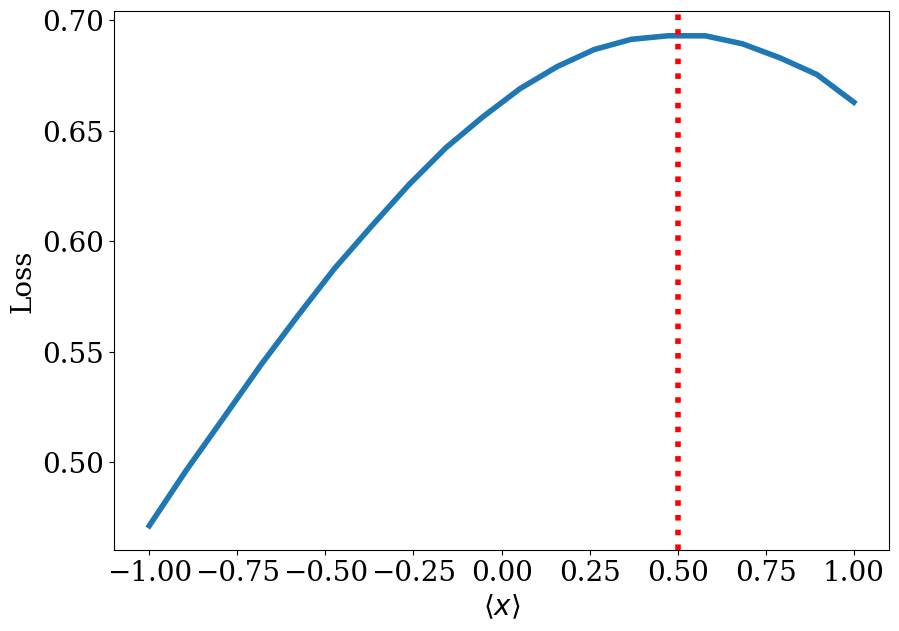

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.xaxis.label.set_color(c)        
ax.yaxis.label.set_color(c)          
ax.tick_params(axis='x', colors=c)  
ax.tick_params(axis='y', colors=c)  
ax.spines['left'].set_color(c)        
ax.spines['top'].set_color(c)
ax.spines['right'].set_color(c) 
ax.spines['bottom'].set_color(c) 

plt.plot(np.linspace(-1,1,20),gausslosses, lw=4)
plt.axvline(1/2, color="r",ls=":", lw=4)
plt.ylabel("Loss")
plt.xlabel(r"$\langle x \rangle$")
plt.savefig("figures/gaussloss.pdf", bbox_inches='tight',  transparent=True)

plt.show()

## Jet Example

In [24]:
data = np.load('npfiles/jetexample.npz')
xvals, yvals, weights, losses1, losses2, lambda1, lambda2 =data.values()

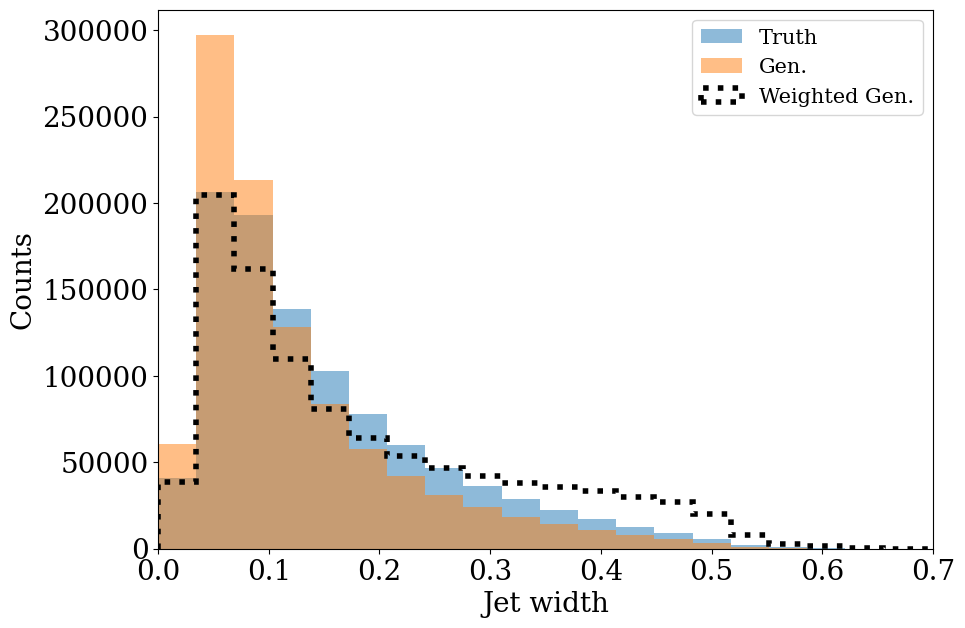

In [26]:
fig, ax = plt.subplots(figsize=(10, 7))

_,_,_=plt.hist(xvals[yvals==1],bins=np.linspace(0,1,30),alpha=0.5,label="Truth")
_,_,_=plt.hist(xvals[yvals==0],bins=np.linspace(0,1,30),alpha=0.5,label="Gen.")
_,_,_=plt.hist(xvals[yvals==0],bins=np.linspace(0,1,30),weights= weights[yvals==0],histtype="step",color="black",ls=":", lw=4,label="Weighted Gen.")
plt.legend(fontsize=15)
plt.xlabel("Jet width")
plt.ylabel("Counts")
plt.xlim(0, 0.7)
plt.savefig("figures/jetexample.pdf", bbox_inches='tight', transparent=True)

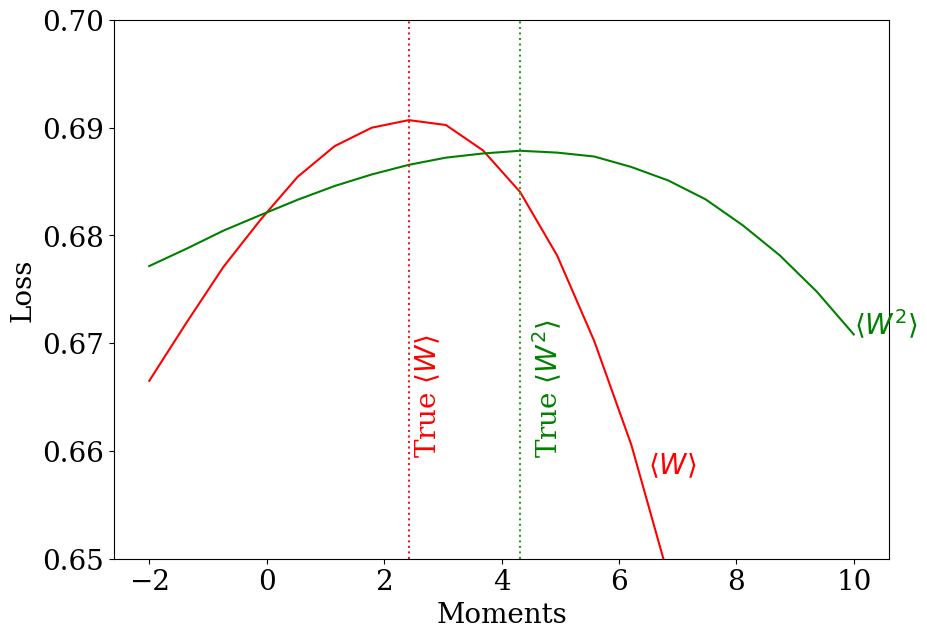

In [32]:
c = 'black'
fig, ax = plt.subplots(figsize=(10, 7))
ax.xaxis.label.set_color(c)        
ax.yaxis.label.set_color(c)          

ax.tick_params(axis='x', colors=c)   
ax.tick_params(axis='y', colors=c)  

ax.spines['left'].set_color(c)        
ax.spines['top'].set_color(c)
ax.spines['right'].set_color(c) 
ax.spines['bottom'].set_color(c) 

plt.plot(np.linspace(-2,10,20),losses1, color='r')
plt.text(np.linspace(-2,10,20)[-1]-3.5,losses1[-1]+0.1, r'$\langle W\rangle$', color='r')
plt.plot(np.linspace(-2,10,20),losses2, color='green')
plt.text(np.linspace(-2,10,20)[-1],losses2[-1], r'$\langle W^2\rangle$', color='green')
plt.axvline(lambda1,color="tab:red",ls=":")
plt.axvline(lambda2,color="tab:green",ls=":")
plt.ylim([0.65,0.7])
plt.ylabel("Loss")
plt.xlabel("Moments")
plt.text(2.5,0.66,r'True $\langle W\rangle$',rotation=90, color='r')
plt.text(4.5,0.66,r'True $\langle W^2\rangle$',rotation=90, color='g')

plt.savefig("figures/jetloss.pdf", bbox_inches='tight', transparent=True)